In [27]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import numpy as np
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('cleaned_final.csv')

In [6]:
#select one hospital
df2 = df[['Month', 'Ayr Hospital']]

In [18]:
df2= df2.sort_values('Month')
df2 = df2.groupby('Month')['Ayr Hospital'].sum().reset_index()
df2 = df2.set_index('Month')
df2.index

Index(['2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
       '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
       '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
       '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
       '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
       '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01'],
      dtype='object', name='Month')

In [25]:
train=df2[0:31] 
test=df2[30:]
test2 =df2[2:]

In [66]:
test2

,Ayr Hospital
Month,
2015-09-01,881.0
2015-10-01,885.0
2015-11-01,833.0
2015-12-01,857.0
2016-01-01,950.0
2016-02-01,854.0
2016-03-01,952.0
2016-04-01,929.0
2016-05-01,1014.0


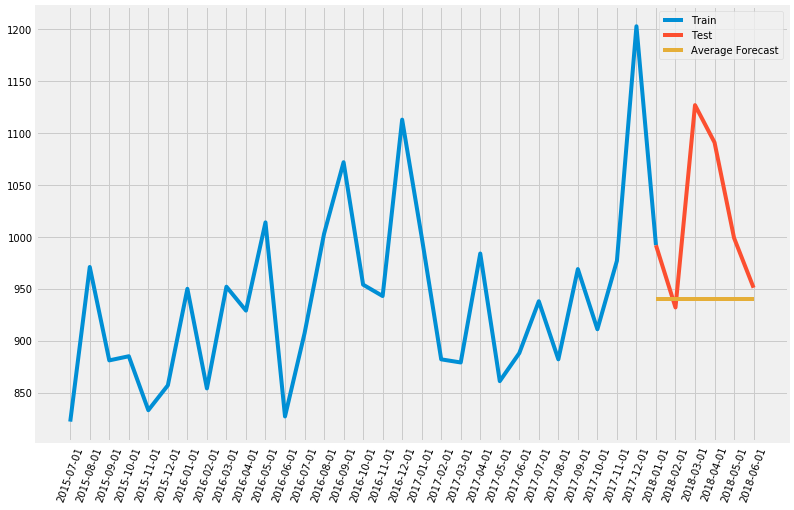

In [26]:
#1st Method Simple Average
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Ayr Hospital'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Ayr Hospital'], label='Train')
plt.plot(test['Ayr Hospital'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.xticks(rotation=70)
plt.show()

In [28]:

rms = mean_squared_error(test ['Ayr Hospital'], y_hat_avg['avg_forecast'])
print(rms)
x = pow(rms, 0.5) 
x

10724.072493929936


103.55709774771566

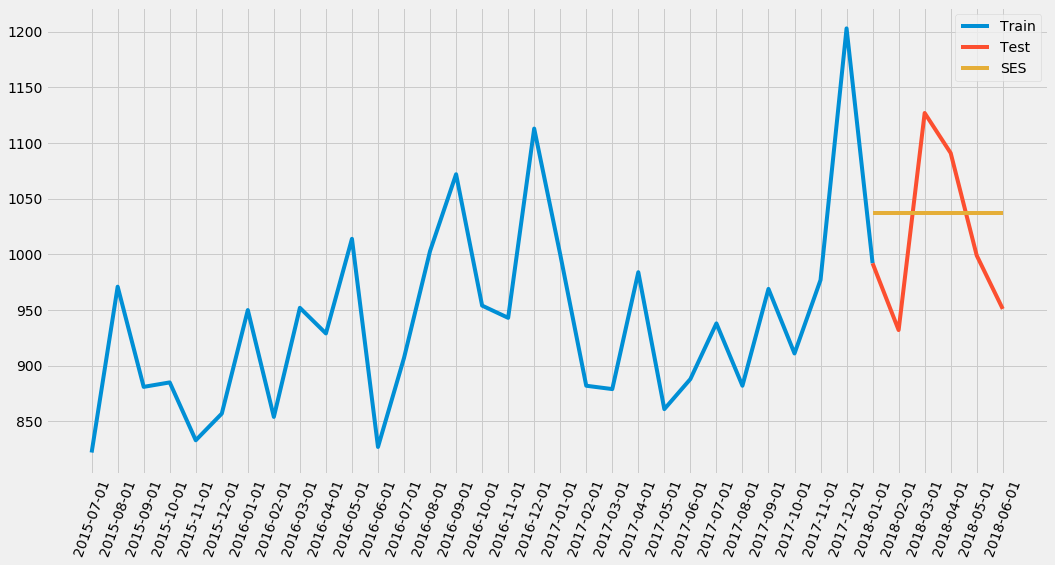

In [33]:
#2nd Method – Simple Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Ayr Hospital'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Ayr Hospital'], label='Train')
plt.plot(test['Ayr Hospital'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.xticks(rotation=70)
plt.show()

In [35]:
rmsex = mean_squared_error(test ['Ayr Hospital'], y_hat_avg['SES'] )
print(rms)

exp = pow(rmsex, 0.5) 
exp

10724.072493929936


73.98739884869259

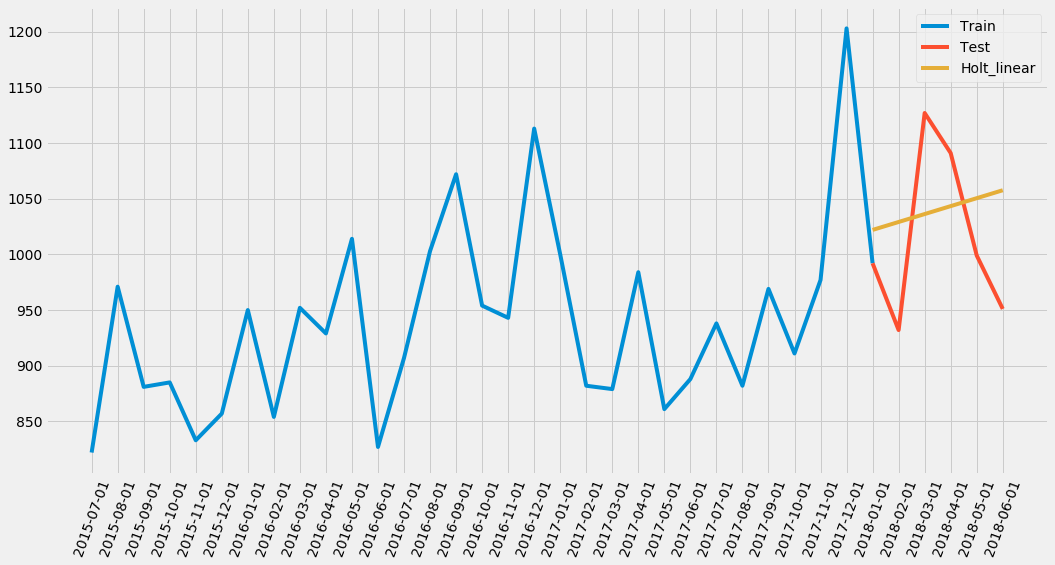

In [37]:
#3rd : Holt’s Linear Trend method
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Ayr Hospital'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Ayr Hospital'], label='Train')
plt.plot(test['Ayr Hospital'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.xticks(rotation=70)
plt.show()

In [38]:
rmsh = mean_squared_error(test ['Ayr Hospital'], y_hat_avg['Holt_linear'])
print(rmsh)

h = pow(rmsh, 0.5) 
h

5808.934558234044


76.21636673467218

In [39]:
y_hat_avg['Holt_linear']

Month
2018-01-01    1021.984347
2018-02-01    1029.109439
2018-03-01    1036.234532
2018-04-01    1043.359624
2018-05-01    1050.484717
2018-06-01    1057.609809
Name: Holt_linear, dtype: float64

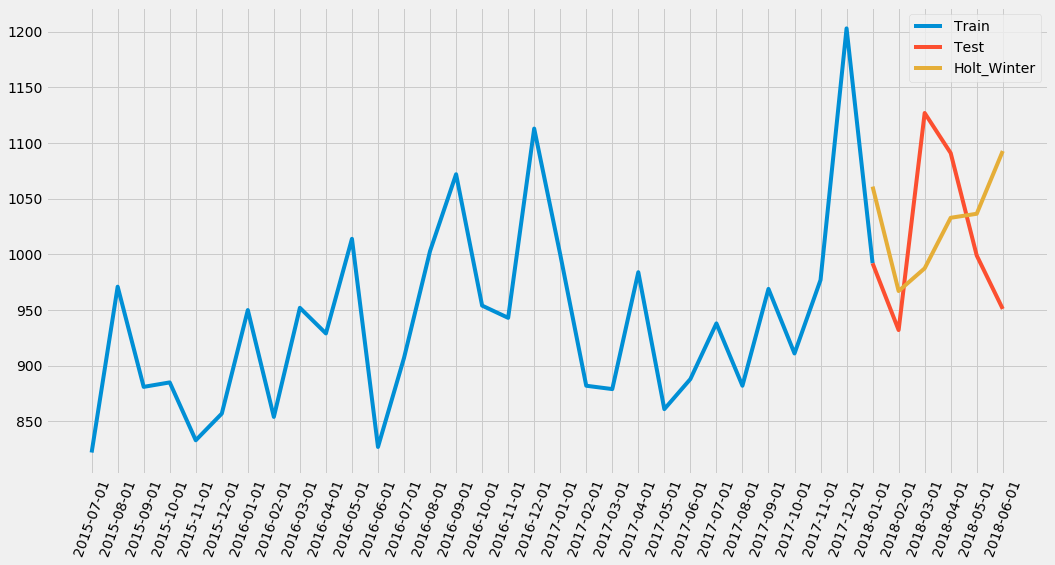

In [44]:
#4th method: Holt-Winters Method

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Ayr Hospital']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Ayr Hospital'], label='Train')
plt.plot(test['Ayr Hospital'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.xticks(rotation=70)
plt.show()

In [45]:
rmsh2 = mean_squared_error(test ['Ayr Hospital'], y_hat_avg['Holt_Winter'])
print(rmsh2)

h2 = pow(rmsh2, 0.5) 
h2

8391.539910861693


91.60534870225479

In [46]:
y_hat_avg['Holt_Winter']

Month
2018-01-01    1060.908386
2018-02-01     967.068275
2018-03-01     987.475927
2018-04-01    1032.877282
2018-05-01    1036.486208
2018-06-01    1092.847301
Name: Holt_Winter, dtype: float64

5th: Time series forecasting with ARIMA

In [47]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [48]:
# try to get the best combination for parameters of ARIMA

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:581.899388037977
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:284.79584412961526
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:294.3789316391757
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:149.71319708551744
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:525.5085541660943
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:272.63475992642753
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:296.7435662724138
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:145.87193116127452
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:414.39522757683307
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:276.4662300767638
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:283.14290244602864
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:136.68498191098334
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:392.23497235331894
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:257.75832670124646
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:277.7520755808231
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:136.99967035448307
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:429.5379392543164
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:282.19774590513026


In [ ]:
# The best parameters is ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:124.30145106966916

In [51]:
# Find the model
#Fitting the ARIMA model


In [50]:
mod = sm.tsa.statespace.SARIMAX(df2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4750      0.510      0.931      0.352      -0.525       1.475
ma.L1         -1.0000      0.351     -2.848      0.004      -1.688      -0.312
ar.S.L12      -0.0061      0.222     -0.027      0.978      -0.441       0.429
sigma2      6229.0357   5.64e-05   1.11e+08      0.000    6229.036    6229.036


ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

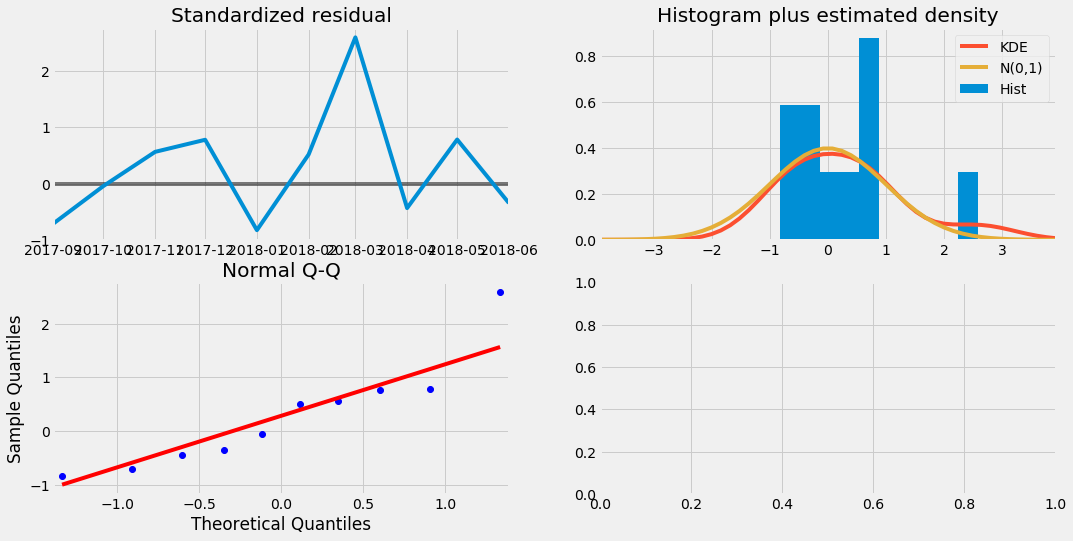

In [57]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

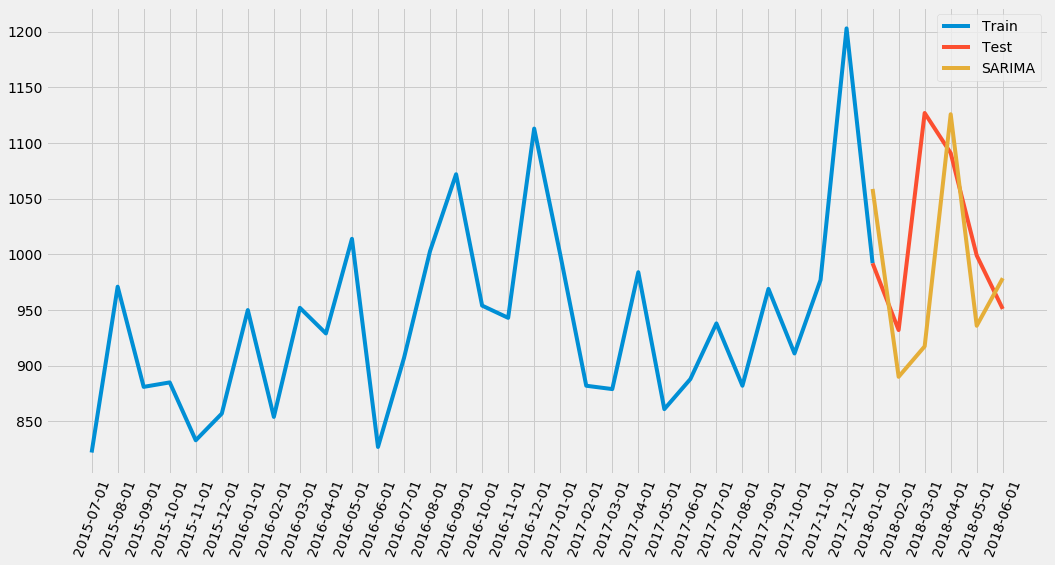

In [63]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(df2, order=(1, 1, 1),seasonal_order=(1,1,0,12) ,enforce_stationarity=False,
                                enforce_invertibility=False).fit()
y_hat_avg['SARIMA'] = fit1.predict(pd.to_datetime('2018-01-01'), dynamic=False)
plt.figure(figsize=(16,8))
plt.plot( train['Ayr Hospital'], label='Train')
plt.plot(test['Ayr Hospital'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.xticks(rotation=70)
plt.show()

In [62]:
y_hat_avg['SARIMA'] 


Month
2018-01-01    1058.785738
2018-02-01     890.040671
2018-03-01     917.363172
2018-04-01    1125.884139
2018-05-01     935.878722
2018-06-01     978.584434
Name: SARIMA, dtype: float64

In [65]:
rmsSA = mean_squared_error(test ['Ayr Hospital'], y_hat_avg['SARIMA'])
print(rmsSA)

hsa = pow(rmsSA, 0.5) 
hsa

9355.103280372052


96.72178286390327

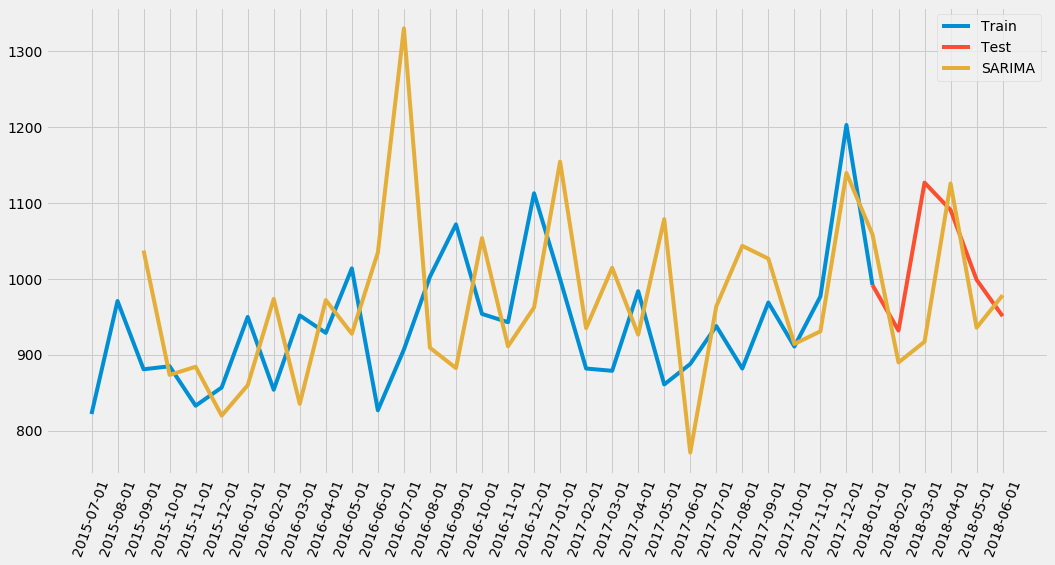

In [68]:
#Do it for long time
y_hat_avg = test2.copy()
fit1 = sm.tsa.statespace.SARIMAX(df2, order=(1, 1, 1),seasonal_order=(1,1,0,12) ,enforce_stationarity=False,
                                enforce_invertibility=False).fit()
y_hat_avg['SARIMA'] = fit1.predict(pd.to_datetime('2015-09-01'), dynamic=False)
plt.figure(figsize=(16,8))
plt.plot( train['Ayr Hospital'], label='Train')
plt.plot(test['Ayr Hospital'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.xticks(rotation=70)
plt.show()

In [69]:
rmsSA2 = mean_squared_error(test2 ['Ayr Hospital'], y_hat_avg['SARIMA'])
print(rmsSA)

hsa2 = pow(rmsSA2, 0.5) 
hsa2

9355.103280372052


130.2303519136608